In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics

# STEP 0: DATA EXPLORATION

In [2]:
# loading the csv data to a Pandas DataFrame
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
# print first 5 rows of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# print last 5 rows of the dataset
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
# number of rows and columns in the dataset
df.shape

(1000, 8)

In [6]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
# statistical measures about the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


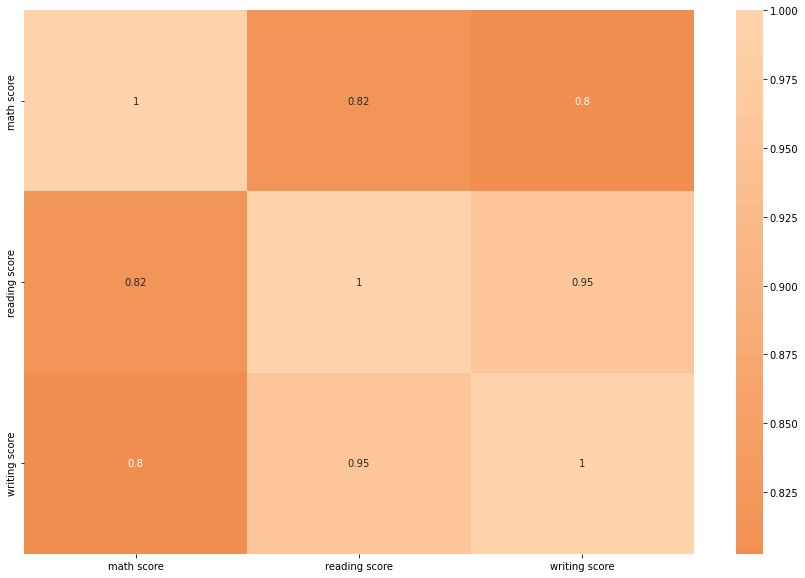

In [8]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,center = 0)
plt.show()

# STEP 1: PRE-PROCESSING

In [9]:
#checking for null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
#adding target attribute named by Grade
df['Mean']=np.round(df[['math score', 'reading score', 'writing score']].mean(axis=1), decimals=2)

In [11]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Mean
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33


In [12]:
def CalcGrade(val):
    if (val<=40):
        return 'D'
    elif (40<val<=60):
        return 'C'
    elif (60< val<=80):
        return 'B'
    else:
        return 'A'
    
df['Grade']=df['Mean'].map(CalcGrade)



In [13]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Mean,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,B
1,female,group C,some college,standard,completed,69,90,88,82.33,A
2,female,group B,master's degree,standard,none,90,95,93,92.67,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,C
4,male,group C,some college,standard,none,76,78,75,76.33,B
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,A
996,male,group C,high school,free/reduced,none,62,55,55,57.33,C
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,B
998,female,group D,some college,standard,completed,68,78,77,74.33,B


In [14]:
df['Grade'].replace(['A', 'B','C','D'],[0,1,2,3], inplace=True)

In [15]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Mean,Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,1
1,female,group C,some college,standard,completed,69,90,88,82.33,0
2,female,group B,master's degree,standard,none,90,95,93,92.67,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,2
4,male,group C,some college,standard,none,76,78,75,76.33,1
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,0
996,male,group C,high school,free/reduced,none,62,55,55,57.33,2
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,1
998,female,group D,some college,standard,completed,68,78,77,74.33,1


<AxesSubplot:>

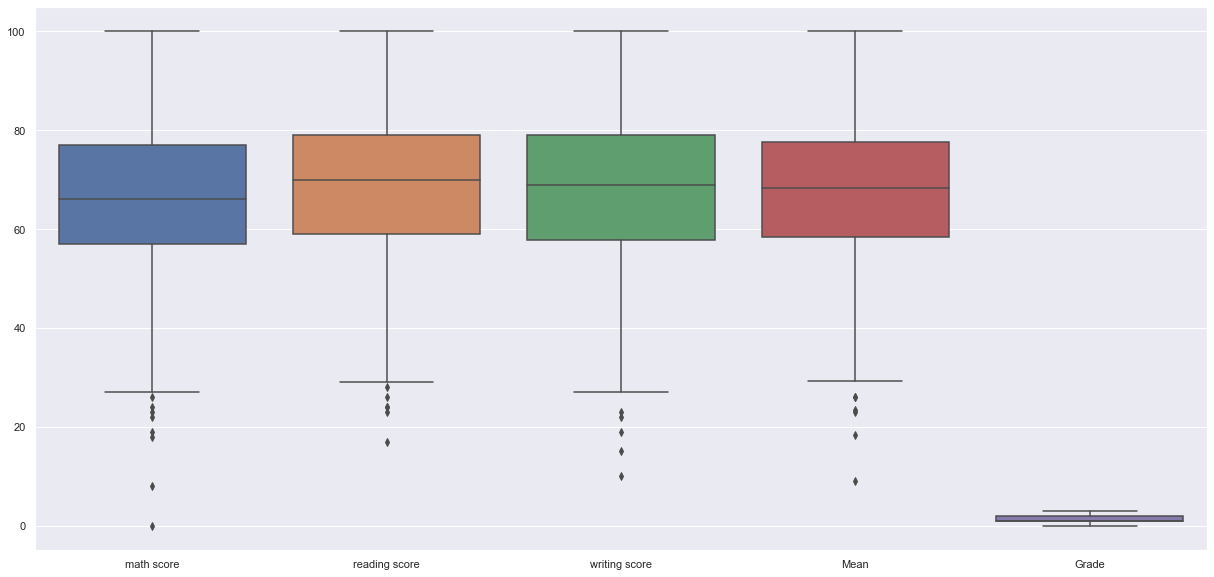

In [16]:
sns.set(rc={'figure.figsize':(21,10)})
sns.boxplot(data=df.iloc[:,:])

In [17]:
def remove_out(colmm):
    
    Q1 = np.percentile(df[colmm], 25,
                    interpolation = 'midpoint')

    Q3 = np.percentile(df[colmm], 75,
                    interpolation = 'midpoint')
    IQR = Q3 - Q1

    print("Old Shape: ", df.shape)

# Upper bound
    upper=Q3+1.5*IQR
#     upper_array=np.array(DF[colmm]>=upper)
    upper_array=np.where(df[colmm]>=upper)

# Lower bound
    lower=Q1-1.5*IQR
#     lower_array=np.array(DF[colmm]<=lower)
    lower_array=np.where(df[colmm]<=lower)

# Removing the outliers

    print(upper_array[0])
    print(lower_array[0])
    df.drop(upper_array[0],inplace=True)
    df.drop(lower_array[0],inplace=True)
    

    print("New Shape: ", df.shape)

In [18]:
remove_out("math score")
remove_out('reading score')
remove_out('writing score')

Old Shape:  (1000, 10)
[]
[ 17  59  91 145 338 363 466 787 842 980]
New Shape:  (990, 10)
Old Shape:  (990, 10)
[]
[ 74 207 323 589 594 887]
New Shape:  (984, 10)
Old Shape:  (984, 10)
[]
[ 73 320 584]
New Shape:  (981, 10)


(981, 10)


<AxesSubplot:>

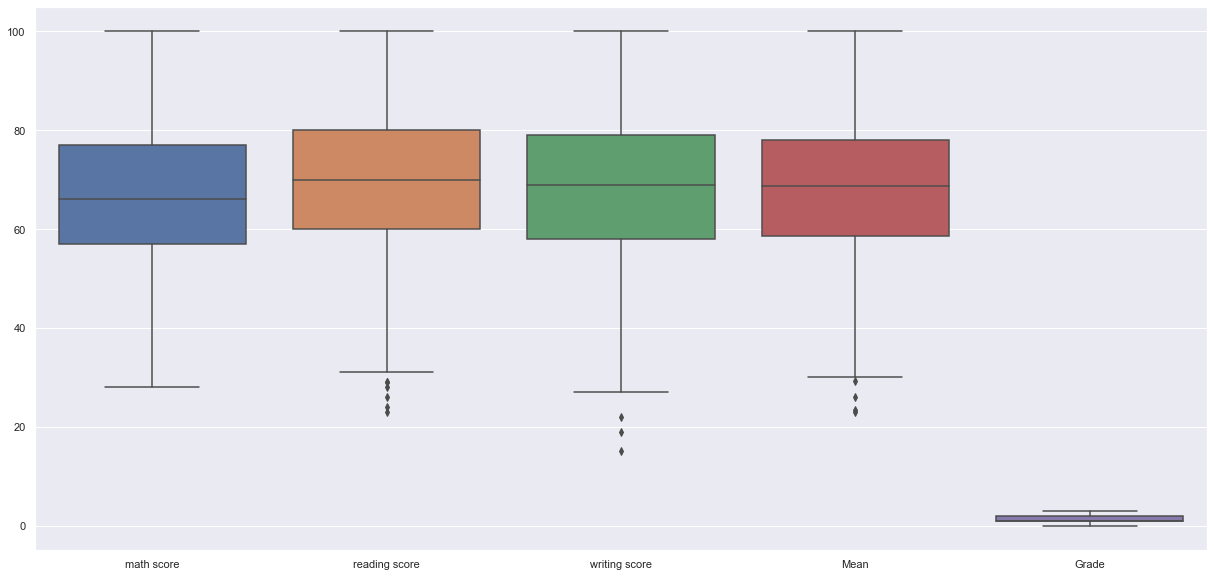

In [19]:
print(df.shape)
sns.set(rc={'figure.figsize':(21,10)})
sns.boxplot(data=df.iloc[:,:])

In [20]:
gender = pd.get_dummies(df['gender'], prefix="gender")
race_ethnicity = pd.get_dummies(df['race/ethnicity'], prefix="race/ethnicity")
parental_level_of_education = pd.get_dummies(df['parental level of education'], prefix="parental level of education")
lunch = pd.get_dummies(df['lunch'], prefix="lunch")
test_preparation_course = pd.get_dummies(df['test preparation course'], prefix="test preparation course")

In [21]:
df_ = [df, gender, race_ethnicity, parental_level_of_education, lunch, test_preparation_course]
df = pd.concat(df_, axis=1)
features =  ['math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       "parental level of education_associate's degree",
       "parental level of education_bachelor's degree",
       'parental level of education_high school',
       "parental level of education_master's degree",
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none']
X = df[features].values
Y = df['Grade'].values

df = df.drop(columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'Mean', 'Grade'])
print(df)

     math score  reading score  writing score  gender_female  gender_male  \
0            72             72             74              1            0   
1            69             90             88              1            0   
2            90             95             93              1            0   
3            47             57             44              0            1   
4            76             78             75              0            1   
..          ...            ...            ...            ...          ...   
995          88             99             95              1            0   
996          62             55             55              0            1   
997          59             71             65              1            0   
998          68             78             77              1            0   
999          77             86             86              1            0   

     race/ethnicity_group A  race/ethnicity_group B  race/ethnicity_group C

# STEP 2: TRAIN-TEST SPLIT and Feature Scaling (Part of Pre-processing)
Splitting training set and test set.

In [22]:
df.columns

Index(['math score', 'reading score', 'writing score', 'gender_female',
       'gender_male', 'race/ethnicity_group A', 'race/ethnicity_group B',
       'race/ethnicity_group C', 'race/ethnicity_group D',
       'race/ethnicity_group E',
       'parental level of education_associate's degree',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test preparation course_completed',
       'test preparation course_none'],
      dtype='object')

In [23]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize(X):
        print("Mean and Standard Deviation Before")
        print(X.mean(axis=0), X.std(axis=0))

        ##### Standardize X part [feature wise scaling!!!!!]
        ##### and ensure that resultant data has mean around 0 and standard deviation 1 !!!
        sc=StandardScaler()
        XScaled = sc.fit_transform(X)

        print("Mean and Standard Deviation After")
        print(XScaled.mean(axis=0).round(4), XScaled.std(axis=0))
        return XScaled

XScaled = normalize(X)

Mean and Standard Deviation Before
[6.65963303e+01 6.95259939e+01 6.84495413e+01 5.13761468e-01
 4.86238532e-01 8.97043833e-02 1.88583078e-01 3.16004077e-01
 2.64016310e-01 1.41692151e-01 2.25280326e-01 1.19266055e-01
 1.93679918e-01 6.01427115e-02 2.27319062e-01 1.74311927e-01
 3.48623853e-01 6.51376147e-01 3.60856269e-01 6.39143731e-01] [14.4453043  14.17836672 14.71775756  0.49981059  0.49981059  0.28575778
  0.39117707  0.46491451  0.44080801  0.34873412  0.4177668   0.32410132
  0.39518098  0.23775106  0.41910035  0.37937749  0.47653464  0.47653464
  0.48024892  0.48024892]
Mean and Standard Deviation After
[-0. -0.  0. -0. -0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0. -0. -0.  0.
  0. -0.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# STEP 3:  DIFFERENT CLASSIFICATIONS

In [24]:
print(X)
print(Y)

[[72 72 74 ...  1  0  1]
 [69 90 88 ...  1  1  0]
 [90 95 93 ...  1  0  1]
 ...
 [59 71 65 ...  0  1  0]
 [68 78 77 ...  1  1  0]
 [77 86 86 ...  0  0  1]]
[1 0 0 2 1 1 0 2 1 2 2 2 1 1 2 1 0 2 2 1 1 2 1 1 1 2 1 1 1 1 1 1 3 0 0 1 2
 0 2 2 1 2 1 2 2 1 1 1 0 2 1 2 0 0 3 0 2 2 1 3 2 1 2 1 3 1 2 2 1 1 2 2 3 1
 1 1 2 2 2 1 3 1 0 1 1 0 1 1 2 0 0 1 1 1 1 1 1 0 2 0 1 0 1 1 1 0 2 2 2 0 1
 0 1 2 1 0 0 0 2 1 0 1 1 1 2 0 2 1 1 1 2 2 1 1 1 1 1 2 2 1 0 1 1 0 1 1 1 2
 1 0 1 2 1 1 1 0 2 2 0 0 2 1 1 1 1 0 0 1 2 0 2 1 1 0 1 2 2 1 2 1 1 1 2 0 1
 1 1 1 1 2 1 2 2 1 1 1 1 1 2 1 1 1 1 1 3 2 2 0 0 0 3 1 2 1 0 1 0 1 2 1 2 1
 0 1 2 1 0 0 1 1 1 2 0 1 0 2 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 0 1 2
 1 1 0 1 1 2 2 1 0 1 0 1 1 1 2 2 1 1 2 0 0 1 1 1 1 1 2 1 1 1 2 1 2 0 1 2 1
 1 1 1 0 2 1 2 1 1 1 1 1 1 0 1 1 1 1 1 2 0 1 3 1 2 1 3 2 0 0 1 1 2 2 2 1 1
 1 1 1 2 0 1 1 1 2 1 2 1 1 1 2 1 0 2 0 2 2 2 2 1 2 0 1 1 1 0 1 2 0 0 1 1 0
 0 1 2 2 1 1 1 1 1 1 1 1 2 1 2 2 0 1 2 2 2 2 0 2 1 1 1 2 0 1 0 1 1 1 1 1 1
 1 2 0 2 2 1 3 1 0 

In [25]:
! pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [26]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

XScaled = normalize(X)

Mean and Standard Deviation Before
[6.65963303e+01 6.95259939e+01 6.84495413e+01 5.13761468e-01
 4.86238532e-01 8.97043833e-02 1.88583078e-01 3.16004077e-01
 2.64016310e-01 1.41692151e-01 2.25280326e-01 1.19266055e-01
 1.93679918e-01 6.01427115e-02 2.27319062e-01 1.74311927e-01
 3.48623853e-01 6.51376147e-01 3.60856269e-01 6.39143731e-01] [14.4453043  14.17836672 14.71775756  0.49981059  0.49981059  0.28575778
  0.39117707  0.46491451  0.44080801  0.34873412  0.4177668   0.32410132
  0.39518098  0.23775106  0.41910035  0.37937749  0.47653464  0.47653464
  0.48024892  0.48024892]
Mean and Standard Deviation After
[-0. -0.  0. -0. -0. -0. -0. -0.  0.  0. -0.  0.  0.  0. -0. -0. -0.  0.
  0. -0.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [27]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',)
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
LRModel = LogisticRegression()

Test Accuracy 99.49238578680203


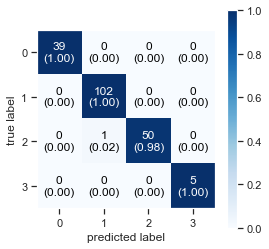

Test Accuracy 97.44897959183673


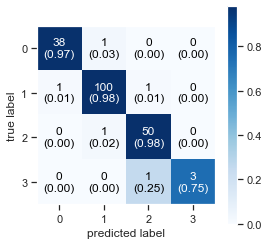

Test Accuracy 96.93877551020408


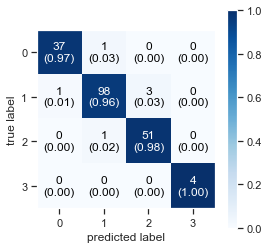

Test Accuracy 94.89795918367348


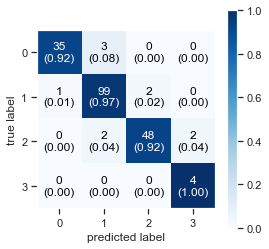

Test Accuracy 97.44897959183673


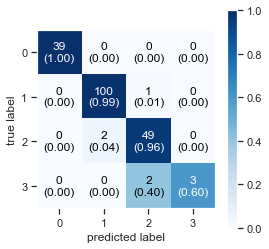

(array([[188.,   5.,   0.,   0.],
        [  3., 499.,   7.,   0.],
        [  0.,   7., 248.,   2.],
        [  0.,   0.,   3.,  19.]]),
 array([2, 2, 2, 1, 1, 0, 1, 3, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0,
        0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 0, 1,
        1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 3,
        2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 0, 1, 1,
        1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0,
        1, 2, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1,
        1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 3, 1, 1,
        1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2,
        1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1,
        2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1

In [28]:
# function for k nearest neighbour
def KNN(cla):
    
    skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    acc=[] 
    y_ori = np.array([], dtype=int)
    y_pre= np.array([], dtype=int)
    net_mat=np.zeros((4,4))
    for train_index, test_index in skf.split(X,Y):
         X_train=X[train_index]
         X_test=X[test_index]
         Y_train=Y[train_index]
         Y_test=Y[test_index]    

         cla.fit(X_train, Y_train)    # change
         Y_testPred = cla.predict(X_test) #change

         y_ori=np.hstack((y_ori,Y_test))
    
 
         y_pre=np.hstack((y_pre,Y_testPred))   
         testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
         print("Test Accuracy", testAccuracy*100)
         acc.append(testAccuracy)   

         matrix1= confusion_matrix(Y_test, Y_testPred)
    #      sum of the total confusion matirx
         net_mat=net_mat+matrix1

         plot_confusion_matrix(matrix1,show_normed=True, colorbar=True, show_absolute=True,figsize=(4,4))   
         plt.show()
    return net_mat,y_ori,y_pre,acc

KNN(knc)

Test Accuracy 95.93908629441624


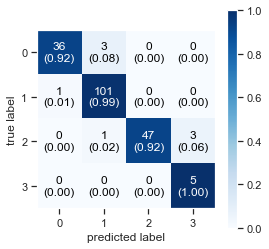

Test Accuracy 93.87755102040816


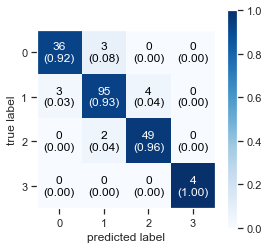

Test Accuracy 95.40816326530613


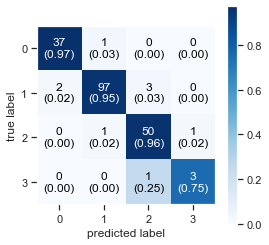

Test Accuracy 94.89795918367348


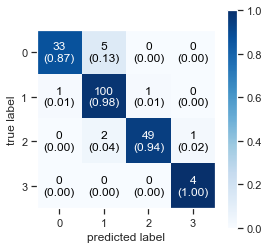

Test Accuracy 96.42857142857143


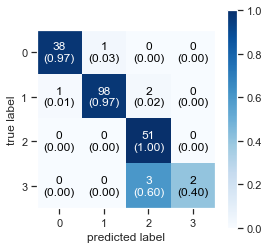

(array([[180.,  13.,   0.,   0.],
        [  8., 491.,  10.,   0.],
        [  0.,   6., 246.,   5.],
        [  0.,   0.,   4.,  18.]]),
 array([2, 2, 2, 1, 1, 0, 1, 3, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0,
        0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 0, 1,
        1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 3,
        2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 0, 1, 1,
        1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0,
        1, 2, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1,
        1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 3, 1, 1,
        1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2,
        1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1,
        2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1

In [29]:
# function for decission tree

def DTree(cla):
    
    skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    acc=[] 
    y_ori = np.array([], dtype=int)
    y_pre= np.array([], dtype=int)
    net_mat=np.zeros((4, 4))
    for train_index, test_index in skf.split(X,Y):
         X_train=X[train_index]
         X_test=X[test_index]
         Y_train=Y[train_index]
         Y_test=Y[test_index]    

         cla.fit(X_train, Y_train)    
         Y_testPred = cla.predict(X_test) 

         y_ori=np.hstack((y_ori,Y_test))
    
 
         y_pre=np.hstack((y_pre,Y_testPred))   
         testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
         print("Test Accuracy", testAccuracy*100)
         acc.append(testAccuracy)   

         matrix1= confusion_matrix(Y_test, Y_testPred)
    #      sum of the total confusion matirx
         net_mat=net_mat+matrix1

         plot_confusion_matrix(matrix1,show_normed=True, colorbar=True, show_absolute=True,figsize=(4,4))   
         plt.show()
    return net_mat,y_ori,y_pre,acc

DTree(dtc)

Test Accuracy 78.68020304568529


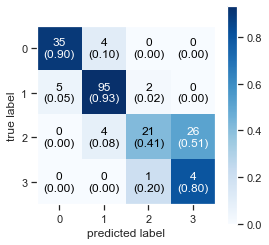

Test Accuracy 89.79591836734694


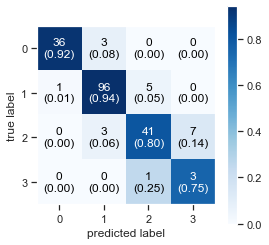

Test Accuracy 90.3061224489796


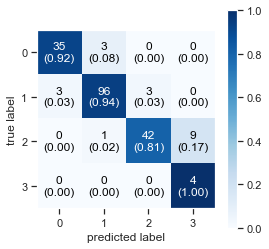

Test Accuracy 88.77551020408163


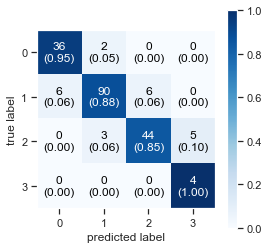

Test Accuracy 87.75510204081633


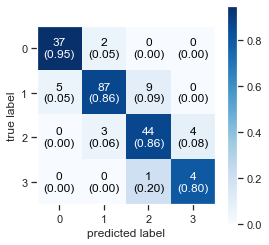

(array([[179.,  14.,   0.,   0.],
        [ 20., 464.,  25.,   0.],
        [  0.,  14., 192.,  51.],
        [  0.,   0.,   3.,  19.]]),
 array([2, 2, 2, 1, 1, 0, 1, 3, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0,
        0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 0, 1,
        1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 3,
        2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 0, 1, 1,
        1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0,
        1, 2, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1,
        1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 3, 1, 1,
        1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2,
        1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1,
        2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1

In [30]:
# function for naive bays classifier

def NB(cla):
    
    skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    acc=[] 
    y_ori = np.array([], dtype=int)
    y_pre= np.array([], dtype=int)
    net_mat=np.zeros((4, 4))
    for train_index, test_index in skf.split(X,Y):
         X_train=X[train_index]
         X_test=X[test_index]
         Y_train=Y[train_index]
         Y_test=Y[test_index]    

         cla.fit(X_train, Y_train)    # change
         Y_testPred = cla.predict(X_test) #change

         y_ori=np.hstack((y_ori,Y_test))
    
 
         y_pre=np.hstack((y_pre,Y_testPred))   
         testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
         print("Test Accuracy", testAccuracy*100)
         acc.append(testAccuracy)   

         matrix1= confusion_matrix(Y_test, Y_testPred)
    #      sum of the total confusion matirx
         net_mat=net_mat+matrix1

         plot_confusion_matrix(matrix1,show_normed=True, colorbar=True, show_absolute=True,figsize=(4,4))   
         plt.show()
    return net_mat,y_ori,y_pre,acc

NB(gnb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy 71.57360406091371


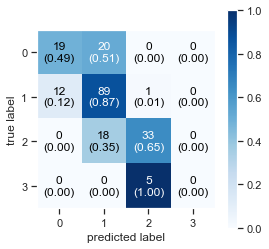

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy 70.91836734693877


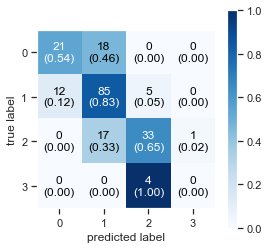

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy 70.40816326530613


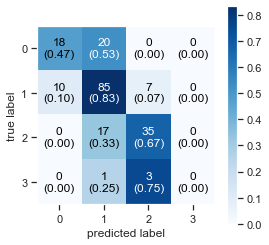

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy 66.3265306122449


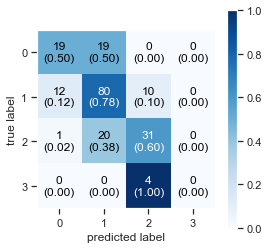

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy 63.775510204081634


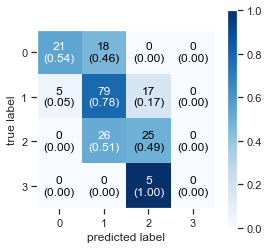

(array([[ 98.,  95.,   0.,   0.],
        [ 51., 418.,  40.,   0.],
        [  1.,  98., 157.,   1.],
        [  0.,   1.,  21.,   0.]]),
 array([2, 2, 2, 1, 1, 0, 1, 3, 1, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 0,
        0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 0, 1,
        1, 0, 0, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 2, 1, 1, 0, 1, 2, 3,
        2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 0, 1, 1,
        1, 0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 2,
        1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 2, 0,
        1, 2, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1,
        1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 3, 1, 1,
        1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 0, 2,
        1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2,
        1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1,
        2, 0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 1

In [31]:
# function for logistic regression 

def LR(cla):
    
    skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
    acc=[] 
    y_ori = np.array([], dtype=int)
    y_pre= np.array([], dtype=int)
    net_mat=np.zeros((4, 4))
    for train_index, test_index in skf.split(X,Y):
         X_train=X[train_index]
         X_test=X[test_index]
         Y_train=Y[train_index]
         Y_test=Y[test_index]    

         cla.fit(X_train, Y_train)   
         Y_testPred = cla.predict(X_test) 

         y_ori=np.hstack((y_ori,Y_test))
    
 
         y_pre=np.hstack((y_pre,Y_testPred))   
         testAccuracy = metrics.accuracy_score(Y_test, Y_testPred)
         print("Test Accuracy", testAccuracy*100)
         acc.append(testAccuracy)   

         matrix1= confusion_matrix(Y_test, Y_testPred)
    #      sum of the total confusion matirx
         net_mat=net_mat+matrix1

         plot_confusion_matrix(matrix1,show_normed=True, colorbar=True, show_absolute=True ,figsize=(4,4))   
         plt.show()
    return net_mat,y_ori,y_pre,acc

LR(LRModel)

application of logistics regression 
Test Accuracy 71.57360406091371


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


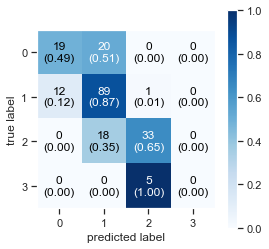

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy 70.91836734693877


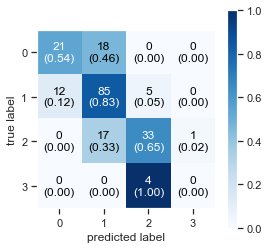

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy 70.40816326530613


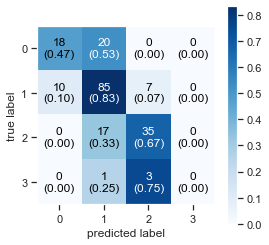

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy 66.3265306122449


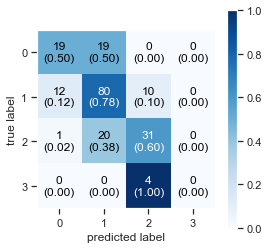

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy 63.775510204081634


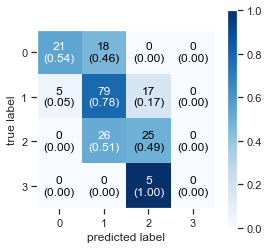

application of Decision Tree classificaiton 
Test Accuracy 95.93908629441624


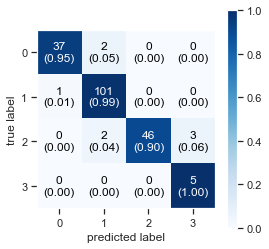

Test Accuracy 93.36734693877551


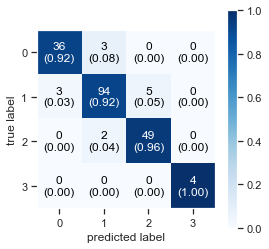

Test Accuracy 95.40816326530613


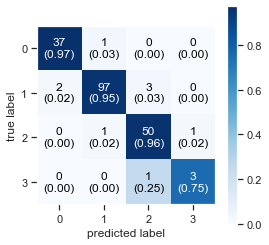

Test Accuracy 94.38775510204081


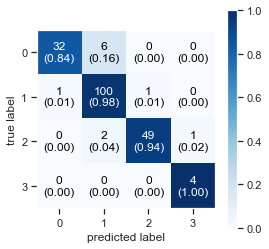

Test Accuracy 96.42857142857143


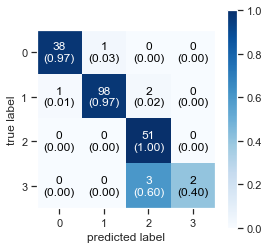

application of Naive Bays classfication 
Test Accuracy 78.68020304568529


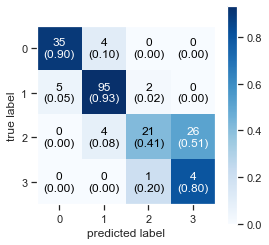

Test Accuracy 89.79591836734694


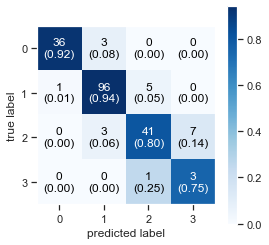

Test Accuracy 90.3061224489796


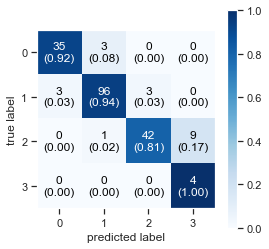

Test Accuracy 88.77551020408163


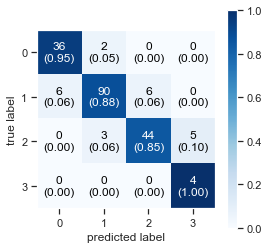

Test Accuracy 87.75510204081633


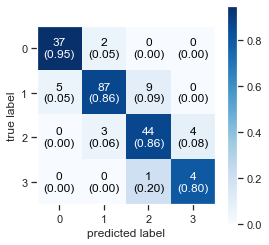

application of K nearest neigbhour classification 
Test Accuracy 99.49238578680203


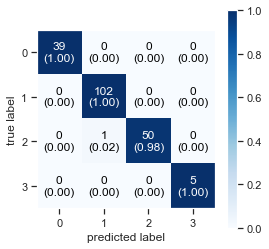

Test Accuracy 97.44897959183673


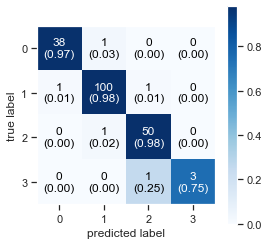

Test Accuracy 96.93877551020408


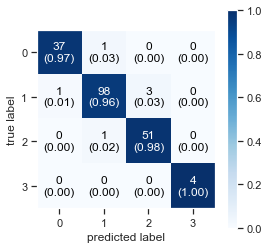

Test Accuracy 94.89795918367348


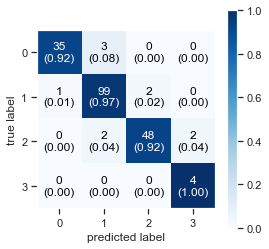

Test Accuracy 97.44897959183673


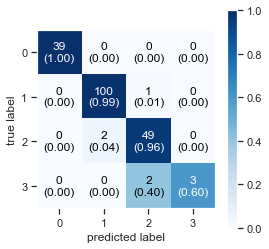

In [32]:
print("application of logistics regression ")
LR_matrix,LR_ori,LR_pre,LR_acc=LR(LRModel)
print("application of Decision Tree classificaiton ")
DTree_matrix,DTree_ori,DTree_pre,DTree_acc=DTree(dtc)
print("application of Naive Bays classfication ")
NB_matrix,NB_ori,NB_pre,NB_acc=NB(gnb)
print("application of K nearest neigbhour classification ")
KNN_matrix,KNN_ori, KNN_pre,KNN_acc=KNN(knc)


In [33]:
# calculating the net confusion matrix for each classification
from sklearn.metrics import classification_report
Dic_accuracy={}
def avgaccr(classifier,matrix,ori,pre,ac):

    print("Report for the "+ classifier +" classifier")
    accc=sum(ac) / len(ac)
    print("average accuracy ", accc )        
    
    plot_confusion_matrix(matrix,show_normed=True, colorbar=True, show_absolute=True,figsize=(4,4))
    
    print("\n")
   
    report=classification_report(ori,pre,output_dict=True)

     
    report_Df=pd.DataFrame(report)
    print(report_Df)
    plt.figure()
    sns.heatmap(report_Df.T,annot=True)
    return {classifier:accc}

Report for the logistic_regression classifier
average accuracy  0.6860043509789703


                    0           1           2     3  accuracy   macro avg  \
precision    0.653333    0.683007    0.720183   0.0  0.686035    0.514131   
recall       0.507772    0.821218    0.610895   0.0  0.686035    0.484971   
f1-score     0.571429    0.745763    0.661053   0.0  0.686035    0.494561   
support    193.000000  509.000000  257.000000  22.0  0.686035  981.000000   

           weighted avg  
precision      0.671591  
recall         0.686035  
f1-score       0.672548  
support      981.000000  


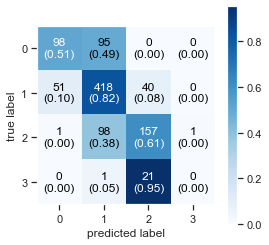

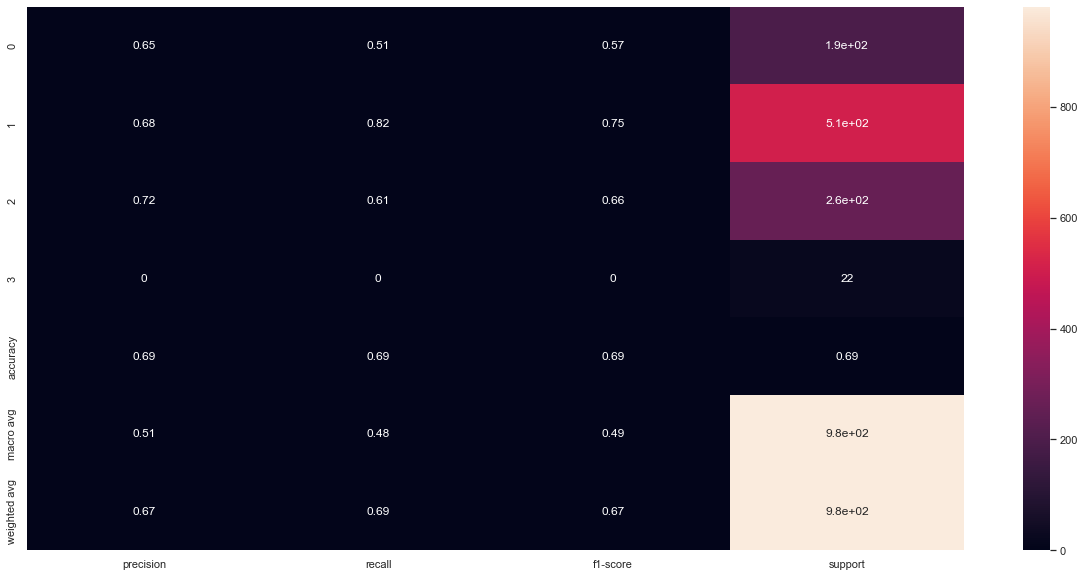

In [34]:
acc1=avgaccr('logistic_regression',LR_matrix,LR_ori,LR_pre,LR_acc)
Dic_accuracy.update(acc1)

Report for the Decisoin_Tree_classifier classifier
average accuracy  0.9510618460582201


                    0           1           2          3  accuracy  \
precision    0.957447    0.960784    0.942308   0.782609   0.95107   
recall       0.932642    0.962672    0.953307   0.818182   0.95107   
f1-score     0.944882    0.961727    0.947776   0.800000   0.95107   
support    193.000000  509.000000  257.000000  22.000000   0.95107   

            macro avg  weighted avg  
precision    0.910787      0.951291  
recall       0.916701      0.951070  
f1-score     0.913596      0.951131  
support    981.000000    981.000000  


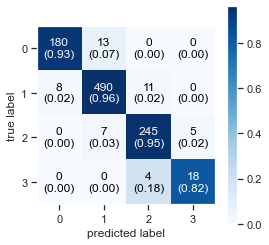

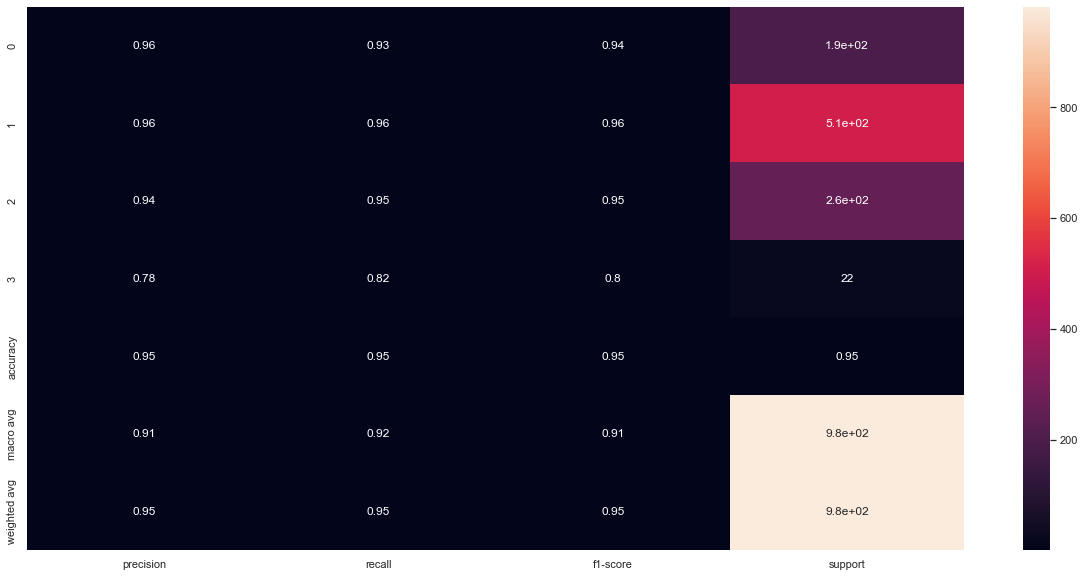

In [35]:
acc2=avgaccr('Decisoin_Tree_classifier',DTree_matrix,DTree_ori,DTree_pre,DTree_acc)
Dic_accuracy.update(acc2)

Report for the Naive_bays_classifier classifier
average accuracy  0.8706257122138196


                    0           1           2          3  accuracy  \
precision    0.899497    0.943089    0.872727   0.271429   0.87054   
recall       0.927461    0.911591    0.747082   0.863636   0.87054   
f1-score     0.913265    0.927073    0.805031   0.413043   0.87054   
support    193.000000  509.000000  257.000000  22.000000   0.87054   

            macro avg  weighted avg  
precision    0.746686      0.901017  
recall       0.862443      0.870540  
f1-score     0.764603      0.880857  
support    981.000000    981.000000  


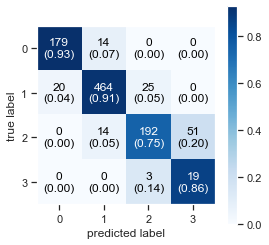

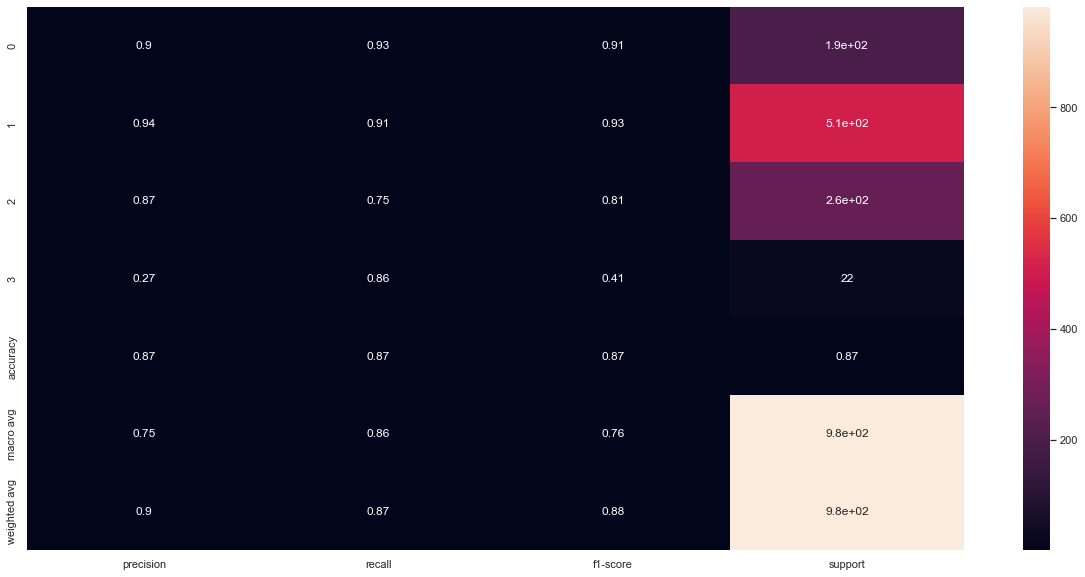

In [36]:
acc3=avgaccr("Naive_bays_classifier",NB_matrix,NB_ori,NB_pre,NB_acc)
Dic_accuracy.update(acc3)

Report for the K_Nearest_neighbour classifier
average accuracy  0.972454159328706


                    0           1           2          3  accuracy  \
precision    0.984293    0.976517    0.961240   0.904762  0.972477   
recall       0.974093    0.980354    0.964981   0.863636  0.972477   
f1-score     0.979167    0.978431    0.963107   0.883721  0.972477   
support    193.000000  509.000000  257.000000  22.000000  0.972477   

            macro avg  weighted avg  
precision    0.956703      0.972435  
recall       0.945766      0.972477  
f1-score     0.951106      0.972437  
support    981.000000    981.000000  


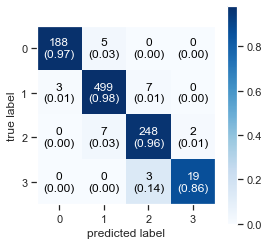

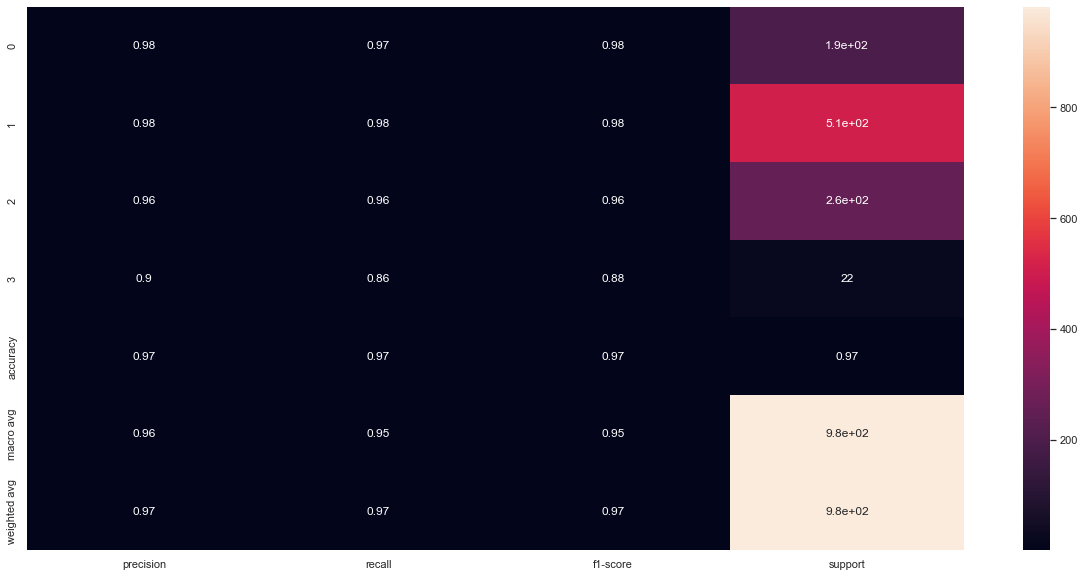

In [37]:
acc4=avgaccr("K_Nearest_neighbour",KNN_matrix,KNN_ori, KNN_pre,KNN_acc)
Dic_accuracy.update(acc4)

<AxesSubplot:>

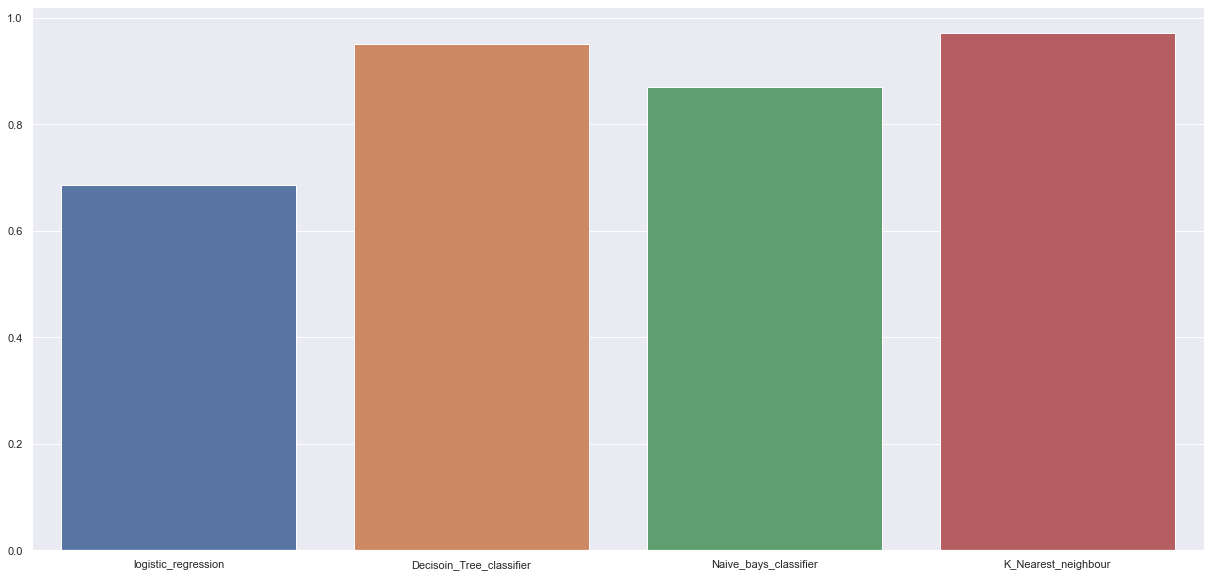

In [38]:
# comparision of the performance of the classifiers on the basis of average accuracy
Dic_accuracy
df1=pd.DataFrame(Dic_accuracy.items())

sns.barplot(x=list(Dic_accuracy.keys()),y=list(Dic_accuracy.values()))